# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* Collect the weather data of each city - latitude and longitude, temperature and maximum temperature in fahrenheit,
  cloudiness and wind_speed in MPH
* We also need each city and cuntry name


In [3]:
# Set all the variables to store the weather information
test_count = 0
set_count = 0
coord_lat = []
coord_lng = []
temperature = []
temp_max = []
date_data = []
country_name = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
final_city_name = []
units = "imperial"
query_url = (
    f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q=")
print("""    Beginning Data Retrieval
---------------------------------""")
# Read the data for each city
for city in cities:
    try:
        print(
            f"Processing Record {test_count+1} of Set {set_count+1} | {city}")
        data = requests.get(query_url+city)
        response_json = data.json()
        # Read the temperaature and max. temperature
        temperature.append(response_json['main']['temp'])
        temp_max.append(response_json['main']['temp_max'])
        # Read the humidity
        humidity.append(response_json['main']['humidity'])
        # Read the cloudiness
        cloudiness.append(response_json['clouds']['all'])
        # Read the wind speed
        wind_speed.append(response_json['wind']['speed'])
        # Read the latitude and longitude
        coord_lat.append(response_json['coord']['lat'])
        coord_lng.append(response_json['coord']['lon'])
        # Read the country name
        country_name.append(response_json['sys']['country'])
        # Read the current date
        date_data.append(response_json['dt'])
        city_name.append(response_json['name'])
    except KeyError:
        print("City not found. Skipping...")

    test_count = test_count+1
    # Set a timer for 60 sec, after reading each 50 cities data
    if test_count == 50:
        set_count = set_count+1
        test_count = 0
        time.sleep(60)
print("""---------------------------------
    Data Retrieval Complete
---------------------------------""")

    Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | stornoway
City not found. Skipping...
Processing Record 5 of Set 1 | ormond beach
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | popondetta
Processing Record 10 of Set 1 | irsha
Processing Record 11 of Set 1 | tumbagaan
Processing Record 12 of Set 1 | cayenne
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | dubai
Processing Record 16 of Set 1 | bang saphan
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | loiza
Processing Record 19 of Set 1 | kiunga
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | provi

Processing Record 34 of Set 4 | gisborne
Processing Record 35 of Set 4 | grootfontein
Processing Record 36 of Set 4 | mbini
Processing Record 37 of Set 4 | north bend
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | temaraia
City not found. Skipping...
Processing Record 40 of Set 4 | new braunfels
Processing Record 41 of Set 4 | abatskoye
Processing Record 42 of Set 4 | abonnema
Processing Record 43 of Set 4 | nibbar
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | kismayo
City not found. Skipping...
Processing Record 46 of Set 4 | starobachaty
Processing Record 47 of Set 4 | usti
City not found. Skipping...
Processing Record 48 of Set 4 | castiglione del lago
Processing Record 49 of Set 4 | ust-barguzin
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | kokstad
Processing Record 2 of Set 5 | zhanakorgan
Processing Record 3 of Set 5 | kelo
City not found. Skipping...
Processing Reco

Processing Record 20 of Set 8 | port-cartier
Processing Record 21 of Set 8 | masasi
Processing Record 22 of Set 8 | vagur
Processing Record 23 of Set 8 | paita
Processing Record 24 of Set 8 | tura
Processing Record 25 of Set 8 | manavalakurichi
Processing Record 26 of Set 8 | santa vitoria do palmar
Processing Record 27 of Set 8 | quatre cocos
Processing Record 28 of Set 8 | hasaki
Processing Record 29 of Set 8 | biltine
Processing Record 30 of Set 8 | boa vista
Processing Record 31 of Set 8 | san quintin
Processing Record 32 of Set 8 | yemtsa
Processing Record 33 of Set 8 | jalu
Processing Record 34 of Set 8 | san vicente
Processing Record 35 of Set 8 | beringovskiy
Processing Record 36 of Set 8 | trelew
Processing Record 37 of Set 8 | aleppo
Processing Record 38 of Set 8 | mana
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | boda
Processing Record 41 of Set 8 | kiyasovo
Processing Record 42 of Set 8 | warrington
Processing Record 43 

Processing Record 7 of Set 12 | collie
Processing Record 8 of Set 12 | cascais
Processing Record 9 of Set 12 | lavrentiya
Processing Record 10 of Set 12 | cordoba
Processing Record 11 of Set 12 | ranong
Processing Record 12 of Set 12 | rungata
City not found. Skipping...
Processing Record 13 of Set 12 | puerto lempira
Processing Record 14 of Set 12 | silver city
Processing Record 15 of Set 12 | smithers
Processing Record 16 of Set 12 | tiznit
Processing Record 17 of Set 12 | san juan del sur
Processing Record 18 of Set 12 | karwar
Processing Record 19 of Set 12 | sao felix do xingu
Processing Record 20 of Set 12 | sabinov
Processing Record 21 of Set 12 | tarpa
Processing Record 22 of Set 12 | tezu
Processing Record 23 of Set 12 | lata
Processing Record 24 of Set 12 | satitoa
City not found. Skipping...
Processing Record 25 of Set 12 | george
Processing Record 26 of Set 12 | walvis bay
Processing Record 27 of Set 12 | sambava
Processing Record 28 of Set 12 | khotyn
Processing Record 29 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert to DataFrame
city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness": cloudiness,
                        "Country": country_name,
                        "Date": date_data,
                        "Humidity": humidity,
                        "Lat": coord_lat,
                        "Lng": coord_lng,
                        "Max Temp": temp_max,
                        "wind speed": wind_speed})

# write the data into the csv file
city_df.to_csv("city_weather_data.csv")
# Column Reordering
city_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
wind speed    560
dtype: int64

In [5]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,wind speed
0,Bluff,0,AU,1540472747,30,-23.58,149.07,79.41,12.44
1,Busselton,64,AU,1540472747,88,-33.64,115.35,66.85,18.81
2,Ormond Beach,75,US,1540471800,83,29.29,-81.06,73.40,11.41
3,Bambous Virieux,40,MU,1540468800,57,-20.34,57.76,78.80,11.41
4,Anadyr,0,RU,1540468800,85,64.73,177.51,14.00,13.42


In [6]:
# Read the date of analysis
timestamp = datetime.fromtimestamp(date_data[0])
actual_date = timestamp.strftime('%m/%d/%y')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Call a defination 'Scatter_plot_show' to display the different scatter plots with provided data
* inputs : Y_axis and the label for y axis and the part of title 
* x_axis is common for all the plots

In [7]:
def Scatter_plot_show(y_axis, sub_title, y_label):
    # Get the x and y axis for scatter plot
    plt.scatter(coord_lat, y_axis, alpha=0.75, edgecolors="black")
    plt.grid()
# Incorporate the other plot properties
    plt.title(f"City Latitude vs. {sub_title} ({actual_date})")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    # Show the plot
    plt.show()

#### Latitude vs. Temperature Plot

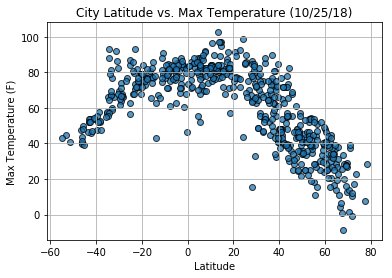

In [8]:
# Call the defination to show the scatter plot
Scatter_plot_show(temp_max, "Max Temperature", "Max Temperature (F)")

#### Latitude vs. Humidity Plot

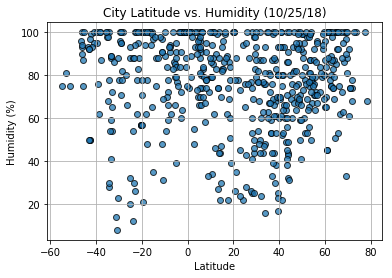

In [9]:
# Call the defination to show the scatter plot
Scatter_plot_show(humidity, "Humidity", "Humidity (%)")

#### Latitude vs. Cloudiness Plot

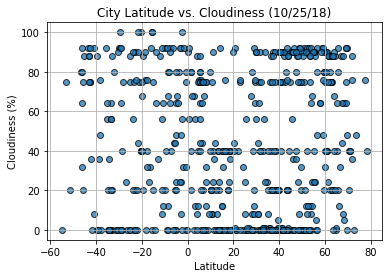

In [10]:
# Call the defination to show the scatter plot
Scatter_plot_show(cloudiness, "Cloudiness", "Cloudiness (%)")


#### Latitude vs. Wind Speed Plot

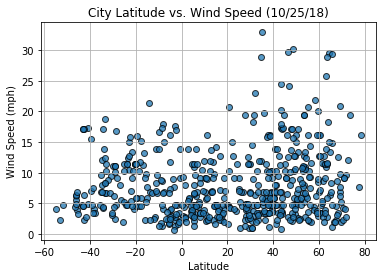

In [11]:
# Call the defination to show the scatter plot
Scatter_plot_show(wind_speed, "Wind Speed", "Wind Speed (mph)")

## Description of four observable trends based on the data

#### Observation 1: 
Latitude is one of the main factors affecting temperature. Latitude is the measurement of the distance of a location on the Earth from the equator. The further away from the equator the location, the less sunlight that this location receives. By observing a Latitude vs. Temperature Plot, we can say that near the equator, (between 0 Deg. to 20 Degs.) temperature is significantly warmer and it proves the theory that near the equator the sun’s rays are more direct and therefore it’s warmer. 

#### Observation 2: 
By observing a Latitude vs. Humidity Plot, most of the cities are in the range of 60% to 100% humidity. Humidity is a measure of the amount of water vapor in the atmosphere. The higher the temperature, the greater the number of water molecules the air can hold.Humidity is not the same everywhere! It can change each day and is generally different in locations that have different climates. On the interior of continents, where the air is further from oceans and less able to pick up vapor from the sea surface, there is generally lower humidity than places that are near the ocean. Also, because warm air can hold more moisture than cool air, locations with warm climates, such as those near the equator, generally have higher humidity than locations with cooler climates, such as those near the poles

#### Observation 3: 
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 40 to 60 degrees, and above 80% cloudiness. Actually, continents tend to be less cloudy than adjacent oceans (at the same latitude)

#### Observation 4: 
There is no strong relationship between latitude and wind speed. By looking at the plot, most of the cities fall into 0 to 15 mph range.  Differences of temperature cause differences in pressure and this drives the wind. Convected energy from the earth's surface rises upward and becomes wind as it begins to move horizontally. This movement is caused primarily by pressure gradient force, as high pressure air moves toward low pressure areas. Curvature of the wind is caused by the rotation of the earth. In the area from the equator to 30 degrees a large circular overturning of air occurs as warm low pressure air rises, moves poleward, cools, and returns to the surface. The cool surface air that moves back towards the equator and completes the circle (northeast and southeast, depending upon the hemisphere). 



